In [496]:
import pandas as pd

Loading Data

In [497]:
df = pd.read_csv('./resources/Data_Science_Internship - Dump.csv')
df = df.drop(columns=['Unnamed: 0'])
# df = df.set_index('Agent_id')
print(df.shape)
# print(len(df.lead_id.unique()))
df.head()

(46608, 15)


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


Examining the data

In [498]:
print(df.shape)
# print(len(df.lost_reason.unique()))
for col in df.columns:
    print(len(df[f'{col}'].unique()))

(46608, 15)
120
6
31
1858
312
478
683
4336
186
35
64
220
15
6
30574


In [499]:
df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

Finding the columns with NaN values, so that we can remove it

In [500]:
NaN_cols = [col for col in df.columns if df[f'{col}'].isnull().any()]
print(NaN_cols)

['lost_reason', 'budget', 'lease', 'movein', 'room_type']


Defining features & target

In [501]:
XX = df.copy()
XX = XX.drop(columns=NaN_cols)
contacted_index = df.index[df.status=='CONTACTED'].tolist()
important_index = df.index[df.status=='IMPORTANT'].tolist()
opportunity_index = df.index[df.status=='OPPORTUNITY'].tolist()
processing_index = df.index[df.status=='PROCESSING'].tolist()
y = pd.DataFrame(XX.pop('status'),columns=['status'])
# X = X[X.index != 'CONTACTED']
# X = X[X.index != 'IMPORTANT']
# X = X[X.index != 'PROCESSING']
# print(y.status.unique())
# print(y[y.status == 'WON'].head())
y.head()

,status
0,LOST
1,LOST
2,LOST
3,LOST
4,LOST


Encoding the target

In [502]:
from sklearn.preprocessing import OrdinalEncoder
y = y.drop(index=contacted_index)
y = y.drop(index=important_index)
y = y.drop(index=opportunity_index)
y = y.drop(index=processing_index)

ordinal_encoder = OrdinalEncoder()
y = pd.DataFrame(ordinal_encoder.fit_transform(y), columns=['status'])
# y = ordinal_encoder.fit_transform(y)

print(y.status.unique())
# print(y.loc[98:].head())
y.reset_index()
y.head()

[0. 1.]


,status
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Encoding the features

In [503]:
XX = pd.DataFrame(ordinal_encoder.fit_transform(XX), columns=XX.columns)
X = XX.copy()
X = X.drop(index=contacted_index)
X = X.drop(index=important_index)
X = X.drop(index=opportunity_index)
X = X.drop(index=processing_index)
X.reset_index()
X.head()

,Agent_id,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,12.0,432.0,2626.0,110.0,5.0,10.0,206.0,8.0,24487.0
1,20.0,432.0,2626.0,110.0,5.0,10.0,74.0,8.0,22098.0
2,87.0,343.0,2630.0,167.0,26.0,3.0,18.0,8.0,17972.0
3,110.0,508.0,2830.0,167.0,26.0,3.0,26.0,8.0,3592.0
4,12.0,432.0,2626.0,110.0,5.0,10.0,137.0,10.0,30099.0


In [504]:
print(X.shape)
print(y.shape)

(46317, 9)
(46317, 1)


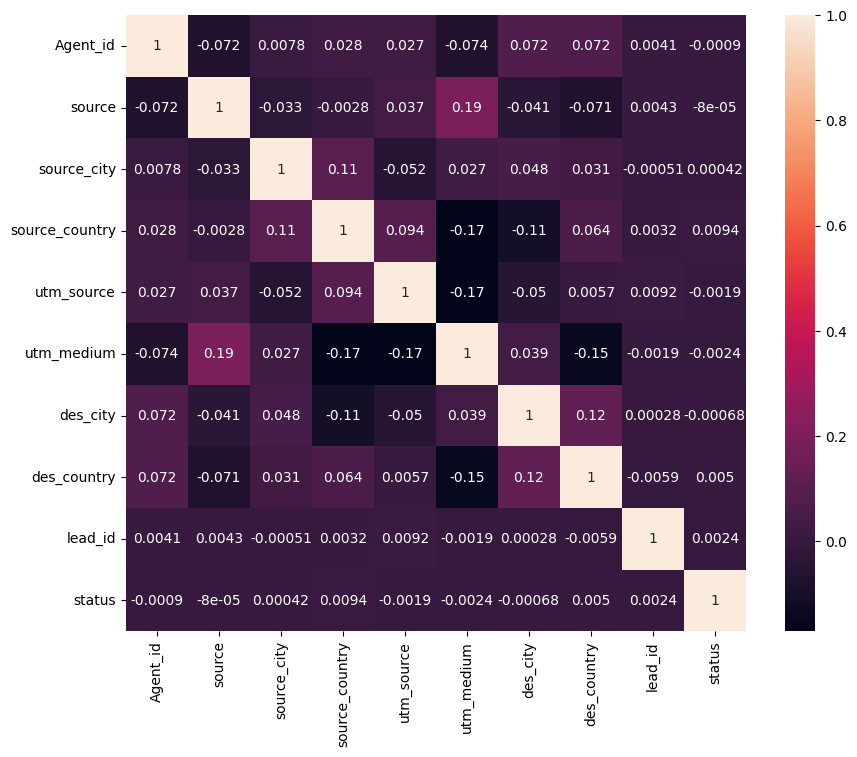

In [505]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(X.join(y).corr(method='pearson'), annot=True)
plt.show()

Bulding the Model

In [506]:
def getmatrix(X_train, X_test, y_train, y_test, model):
    
    preds = model.predict(X_test)
    return confusion_matrix(y_test, preds)

/tmp/ipykernel_137207/2824270293.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


[[8615   30]
 [ 581   38]]


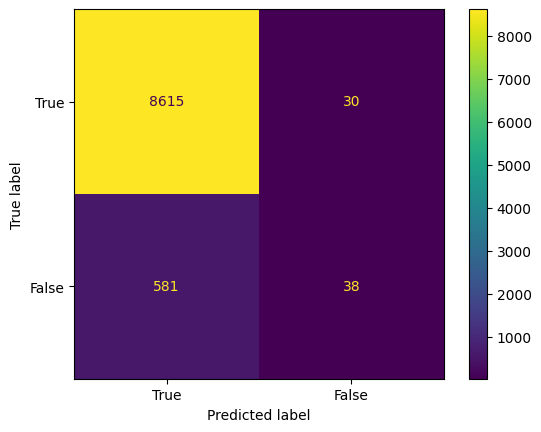

In [507]:
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import f1_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
# print(getMAE(X_train, X_test, y_train, y_test, model))
# print(getAccuracy(X_train, X_test, y_train, y_test, model))
# print(getPrecision(X_train, X_test, y_train, y_test, model))
# print(getRecall(X_train, X_test, y_train, y_test, model))
# print(getF1_score(X_train, X_test, y_train, y_test, model))

confusion_matrix = getmatrix(X_train, X_test, y_train, y_test, model)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['True','False'])

print(confusion_matrix)
cm_display.plot()
plt.show() 



In [508]:
TP = confusion_matrix[0][0]
TN = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

Accuracy = (TP + TN)/(TP + TN + FP + FN)
print(f"Accuracy : {Accuracy}")
Precison = TP/(TP+FP)
print(f"Precison : {Precison}")
Recall = TP/(TP+FN)
print(f"Recall   : {Recall}")
F1_score = (2*Precison*Recall)/(Precison + Recall)
print(f"F1_score : {F1_score}")

Accuracy : 0.9340457685664939
Precison : 0.9965297860034702
Recall   : 0.936820356676816
F1_score : 0.9657530407488369


A personal test

In [509]:
# import numpy as np
# # print(model.predict(X[X.index==y[y.status==1].index]))
# won_rows = y[y.status==1].index
# print(won_rows.shape)
# prediction = model.predict(X.loc[won_rows,:])
# print(prediction)
# unique_vals, counts = np.unique(prediction, return_counts=True)
# unique_counts = dict(zip(unique_vals, counts))
# print(unique_counts)

# Lead Score Prediction

The leads labelled with 'WON' or 'LOST' status are already determined 

We have to predict the likelihood of leads with other statuses being 'WON'

In [510]:
df_opportunity = df.loc[opportunity_index,:]
df_contacted = df.loc[contacted_index,:]
df_processing = df.loc[processing_index,:]
df_important = df.loc[important_index,:]

df_leadScore = pd.concat([df_opportunity,df_contacted,df_processing,df_important], axis=0)

X_opportunity = XX.loc[opportunity_index,:]
X_contacted = XX.loc[contacted_index,:]
X_processing = XX.loc[processing_index,:]
X_important = XX.loc[important_index,:]

X_leadScore = pd.concat([X_opportunity,X_contacted,X_processing,X_important], axis=0)

prob_won = model.predict_proba(X_leadScore)[0:,1]
# X_leadScore['lead_score'] = prob_won
# X_leadScore['lead_score'] *= 100
# X_leadScore.lead_score.head()
df_leadScore['lead_score'] = prob_won
# df_leadScore['lead_score'] *= 100
df_leadScore.lead_score.head()

182     0.09
613     0.00
820     0.22
896     0.00
1419    0.05
Name: lead_score, dtype: float64

On the grounds of common sense, the leads marked as 'IMPORTANT' have greater possibility of being as customer than those marked as 'PROCESSING' which in turn have greater possibilty than 'CONTACTED', giving 'OPPURTUNITY' the least possibility

So, let's assign a weight of 1,2,4 & 8 to their lead_score

In [511]:

for index in contacted_index:
    val = df_leadScore.at[index,'lead_score']
    df_leadScore.at[index,'lead_score'] = val * 2

for index in processing_index:
    val = df_leadScore.at[index,'lead_score']
    df_leadScore.at[index,'lead_score'] = val * 4

for index in important_index:
    val = df_leadScore.at[index,'lead_score']
    df_leadScore.at[index,'lead_score'] = val * 8

Since the range of the values are between 0 & 1 & final lead score has to be between 1 & 100,
Let's multiply the lead score by 100

In [512]:
for index in df_leadScore.index:
    val = df_leadScore.at[index,'lead_score']
    df_leadScore.at[index,'lead_score'] = val * 100

df_leadScore.sort_values(by=['lead_score'], ascending=False).head()
# df_leadScore.head(10)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,lead_score
17445,53eb7f9dcaa22b09db85547fa158a6893089db596bfdcc...,PROCESSING,NaN,100,full-year-stay,01/09/23,dfe8ecc0693503f620f2aa7496c336d1af968dfdcb2143...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,9ac56ef275bb33f0f931abd846e53e845a80af8a549100...,82244417f956ac7c599f191593f7e441a4fafa20a4158f...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,0d2a0640b2a2960931b6b826a059109e03e8a549bb00a4...,84.0
8147,242b2436696fc7a2b305099e519fbadd8c55b46c4ae62d...,PROCESSING,NaN,£121 - £180 Per Week,Complete Education Year Stay 50 - 52 weeks,04/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,18eda641db88b4151b95700d497723ade1139592753082...,84ce677eb0e3ddaa4e1595d71e79e1e40bf0081fd2c82c...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,fab08333ba9c0b4498c602cdd2e6b5bd7211e21a072028...,68.0
2469,b599c03fdf93e1beabd4a03795da989d54879be820d345...,CONTACTED,NaN,£121 - £180 Per Week,Summer/Short Stay 8 - 12 weeks,23/09/23,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,54818870165a6374576f54458561a3d1592c45e7d49bd4...,a0d037328a882606142f7defe732e4702ccb041870b9d5...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,c384826dfbfce62c3fd99a46984a56fe71546a85c2cb6c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,dda68b1b954085ed1d2d7d24258c37dfe4ee676c48883a...,66.0
23000,53eb7f9dcaa22b09db85547fa158a6893089db596bfdcc...,CONTACTED,NaN,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,30/08/23,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,0a23e07465d56693db01b4fede642c9c4b1b9ae42a5b08...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,bf5ade33b5b472c3599473a5cb4e5c7037e4c73296b7e9...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d123c293ab6fb5df0fc6f6a5f4a48eba55b630c6609e68...,64.0
17490,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,OPPORTUNITY,NaN,109,48,NaN,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,5c7dfd7a7d9d77efb358a37e81a7b07814a07e95902e29...,e28406d05650a1fab7eb01a80ef73a2e3460a214fe4860...,d15690f08a575024650b01ffac892cfd2b93e6c57c140f...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,acb208d3ac02ab6d5a45120b4187f12bc41a132011fe1c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,792c8616e67200912e4207d55dd8e41e296b30c1ff2566...,57.0


The leads with the best chances of being customer(i.e, getting status of 'WON') is....

In [513]:
print("Their ID's are: ")
df_leadScore.sort_values(by=['lead_score'], ascending=False).lead_id.head(10)

Their ID's are: 


17445    0d2a0640b2a2960931b6b826a059109e03e8a549bb00a4...
8147     fab08333ba9c0b4498c602cdd2e6b5bd7211e21a072028...
2469     dda68b1b954085ed1d2d7d24258c37dfe4ee676c48883a...
23000    d123c293ab6fb5df0fc6f6a5f4a48eba55b630c6609e68...
17490    792c8616e67200912e4207d55dd8e41e296b30c1ff2566...
17112    0a5d1ec350ddbdab78eddee96151b9a32ba2d9224686e0...
38892    d346ce1e537629f2d1cad0e3c17ac852ae8fe941a4d5c7...
17797    5ee88084970ff6197a9db941986099787e645d68c24319...
24633    f6c6ee4efeacf946075aa29742cf815a27d5b6b9ad7261...
3245     143e01993cfd125e4ad006fb6c49750c51dcbfcef6a2e0...
Name: lead_id, dtype: object